# Thesis Codes  by Korkut Anapa

## Case Study 1 - Digital Twin of a Performance Lab

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import joblib
from sklearn.metrics import mean_absolute_error as MAE
import matplotlib.pyplot as plt
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson
from numpy import mean
from numpy import std

Domain Expert Features

In [2]:
DE=[ 'T','WC','1OYSum of SURE', '1OYSum of CIRC_TIME',
       '1OYSum of WI', '1OYMax of DEVIR', '1OYMax of TEMP', '1OYSum of ALT_C',
       '1OYSum of ÜST_C', '1OYSum of TEPE_C', '1OYSum of BEKLEME',
       '2AYSum of SURE', '2AYSum of CIRC_TIME', '2AYSum of WI',
       '2AYMax of DEVIR', '2AYMax of TEMP', '2AYSum of ALT_C',
       '2AYSum of ÜST_C', '2AYSum of TEPE_C', '4SGDSum of SURE',
       '4SGDSum of CIRC_TIME', '4SGDSum of WI', '4SGDMax of DEVIR',
       '4SGDSum of ALT_C', '4SGDSum of ÜST_C', '4SGDSum of TEPE_C',
       '7SCD2Sum of kapalı', '7SCD2Sum of SURE', '7SCD2Sum of CIRC_TIME',
       '7SCD2Sum of WI', '7SCD2Max of DEVIR', '7SCD2Max of TEMP',
       '7SCD2Sum of ALT_C', '7SCD2Sum of ÜST_C', '7SCD2Sum of TEPE_C',
       '10KUSum of SURE', '10KUSum of BEKLEME', '10KUSum of FAN',
       '10KUSum of KAPI ACMA', '10KUSum of FAN / KLAPE']

Individual Variables of the Dishwasher Cleaning Cycle

In [3]:
indvar=['1OYSum of kapalı' , '1OYSum of SURE' , '1OYSum of CIRC_TIME' , '1OYSum of WI' , '1OYMax of DEVIR',
      '1OYMax of TEMP' , '1OYSum of ALT_C' , '1OYSum of ÜST_C' , '1OYSum of TEPE_C' , '1OYSum of ZONE_C' , '1OYSum of BEKLEME' ,
      '1OYSum of FAN' , '1OYSum of KAPI ACMA' , '1OYSum of FAN / KLAPE' , '1OYSum of GAUDI_offset' ,
      '1OYSum of GAUDI_nonoffset' , '2AYSum of kapalı' , '2AYSum of SURE' , '2AYSum of CIRC_TIME' , '2AYSum of WI' ,
      '2AYMax of DEVIR' , '2AYMax of TEMP' , '2AYSum of ALT_C' , '2AYSum of ÜST_C' , '2AYSum of TEPE_C' , '2AYSum of ZONE_C' , 
      '2AYSum of BEKLEME' , '2AYSum of FAN' , '2AYSum of KAPI ACMA' , '2AYSum of FAN / KLAPE' , '2AYSum of GAUDI_offset' , 
      '2AYSum of GAUDI_nonoffset' , '3MFTSum of kapalı' , '3MFTSum of SURE' , '3MFTSum of CIRC_TIME' , '3MFTSum of WI' ,
      '3MFTMax of DEVIR' , '3MFTMax of TEMP' , '3MFTSum of ALT_C' , '3MFTSum of ÜST_C' , '3MFTSum of TEPE_C' , 
      '3MFTSum of ZONE_C' , '3MFTSum of BEKLEME' , '3MFTSum of FAN', '3MFTSum of KAPI ACMA' , '3MFTSum of FAN / KLAPE' , 
      '3MFTSum of GAUDI_offset' , '3MFTSum of GAUDI_nonoffset' , '4SGDSum of kapalı' , '4SGDSum of SURE' , 
      '4SGDSum of CIRC_TIME', '4SGDSum of WI' , '4SGDMax of DEVIR' , '4SGDMax of TEMP' , '4SGDSum of ALT_C' , 
      '4SGDSum of ÜST_C' , '4SGDSum of TEPE_C' , '4SGDSum of ZONE_C' , '4SGDSum of BEKLEME' , '4SGDSum of FAN' , 
      '4SGDSum of KAPI ACMA' , '4SGDSum of FAN / KLAPE' , '4SGDSum of GAUDI_offset' , '4SGDSum of GAUDI_nonoffset' , 
      '5ERSum of kapalı' , '5ERSum of SURE' , '5ERSum of CIRC_TIME' , '5ERSum of WI' , '5ERMax of DEVIR' , '5ERMax of TEMP' ,
      '5ERSum of ALT_C' , '5ERSum of ÜST_C' , '5ERSum of TEPE_C' , '5ERSum of ZONE_C' , '5ERSum of BEKLEME' ,
      '5ERSum of FAN' , '5ERSum of KAPI ACMA' , '5ERSum of FAN / KLAPE' , '5ERSum of GAUDI_offset' , 
      '5ERSum of GAUDI_nonoffset' , '6SCD1Sum of kapalı' , '6SCD1Sum of SURE' , '6SCD1Sum of CIRC_TIME' , '6SCD1Sum of WI' , 
      '6SCD1Max of DEVIR' , '6SCD1Max of TEMP' , '6SCD1Sum of ALT_C' , '6SCD1Sum of ÜST_C' , '6SCD1Sum of TEPE_C' , 
      '6SCD1Sum of ZONE_C' , '6SCD1Sum of BEKLEME' , '6SCD1Sum of FAN' , '6SCD1Sum of KAPI ACMA' , '6SCD1Sum of FAN / KLAPE' ,
      '6SCD1Sum of GAUDI_offset' , '6SCD1Sum of GAUDI_nonoffset' , '7SCD2Sum of kapalı' , '7SCD2Sum of SURE' , 
      '7SCD2Sum of CIRC_TIME' , '7SCD2Sum of WI' , '7SCD2Max of DEVIR' , '7SCD2Max of TEMP' , '7SCD2Sum of ALT_C' , 
      '7SCD2Sum of ÜST_C' , '7SCD2Sum of TEPE_C' , '7SCD2Sum of ZONE_C' , '7SCD2Sum of BEKLEME' , '7SCD2Sum of FAN' , 
      '7SCD2Sum of KAPI ACMA' , '7SCD2Sum of FAN / KLAPE' , '7SCD2Sum of GAUDI_offset' , '7SCD2Sum of GAUDI_nonoffset' , 
      '8DSBSum of kapalı' , '8DSBSum of SURE' , '8DSBSum of CIRC_TIME' , '8DSBSum of WI' , '8DSBMax of DEVIR' , 
      '8DSBMax of TEMP' , '8DSBSum of ALT_C' , '8DSBSum of ÜST_C', '8DSBSum of TEPE_C' , '8DSBSum of ZONE_C' ,
      '8DSBSum of BEKLEME' , '8DSBSum of FAN' , '8DSBSum of KAPI ACMA' , '8DSBSum of FAN / KLAPE' , '8DSBSum of GAUDI_offset' ,
      '8DSBSum of GAUDI_nonoffset', '9RYSum of kapalı' , '9RYSum of SURE' , '9RYSum of CIRC_TIME' , '9RYSum of WI' , 
      '9RYMax of DEVIR' , '9RYMax of TEMP' , '9RYSum of ALT_C' , '9RYSum of ÜST_C', '9RYSum of TEPE_C' , '9RYSum of ZONE_C' ,
      '9RYSum of BEKLEME' , '9RYSum of FAN' , '9RYSum of KAPI ACMA' , '9RYSum of FAN / KLAPE' , '9RYSum of GAUDI_offset' ,
      '9RYSum of GAUDI_nonoffset' , '10KUSum of kapalı' , '10KUSum of SURE' , '10KUSum of CIRC_TIME' , '10KUSum of WI' , 
      '10KUMax of DEVIR' , '10KUMax of TEMP' , '10KUSum of ALT_C' , '10KUSum of ÜST_C', '10KUSum of TEPE_C' ,
      '10KUSum of ZONE_C' , '10KUSum of BEKLEME' , '10KUSum of FAN' , '10KUSum of KAPI ACMA' , '10KUSum of FAN / KLAPE' ,
      '10KUSum of GAUDI_offset', '10KUSum of GAUDI_nonoffset']

All features

In [4]:
ALL=['T','WC','1OYSum of kapalı' , '1OYSum of SURE' , '1OYSum of CIRC_TIME' , '1OYSum of WI' , '1OYMax of DEVIR',
      '1OYMax of TEMP' , '1OYSum of ALT_C' , '1OYSum of ÜST_C' , '1OYSum of TEPE_C' , '1OYSum of ZONE_C' , '1OYSum of BEKLEME' ,
      '1OYSum of FAN' , '1OYSum of KAPI ACMA' , '1OYSum of FAN / KLAPE' , '1OYSum of GAUDI_offset' ,
      '1OYSum of GAUDI_nonoffset' , '2AYSum of kapalı' , '2AYSum of SURE' , '2AYSum of CIRC_TIME' , '2AYSum of WI' ,
      '2AYMax of DEVIR' , '2AYMax of TEMP' , '2AYSum of ALT_C' , '2AYSum of ÜST_C' , '2AYSum of TEPE_C' , '2AYSum of ZONE_C' , 
      '2AYSum of BEKLEME' , '2AYSum of FAN' , '2AYSum of KAPI ACMA' , '2AYSum of FAN / KLAPE' , '2AYSum of GAUDI_offset' , 
      '2AYSum of GAUDI_nonoffset' , '3MFTSum of kapalı' , '3MFTSum of SURE' , '3MFTSum of CIRC_TIME' , '3MFTSum of WI' ,
      '3MFTMax of DEVIR' , '3MFTMax of TEMP' , '3MFTSum of ALT_C' , '3MFTSum of ÜST_C' , '3MFTSum of TEPE_C' , 
      '3MFTSum of ZONE_C' , '3MFTSum of BEKLEME' , '3MFTSum of FAN', '3MFTSum of KAPI ACMA' , '3MFTSum of FAN / KLAPE' , 
      '3MFTSum of GAUDI_offset' , '3MFTSum of GAUDI_nonoffset' , '4SGDSum of kapalı' , '4SGDSum of SURE' , 
      '4SGDSum of CIRC_TIME', '4SGDSum of WI' , '4SGDMax of DEVIR' , '4SGDMax of TEMP' , '4SGDSum of ALT_C' , 
      '4SGDSum of ÜST_C' , '4SGDSum of TEPE_C' , '4SGDSum of ZONE_C' , '4SGDSum of BEKLEME' , '4SGDSum of FAN' , 
      '4SGDSum of KAPI ACMA' , '4SGDSum of FAN / KLAPE' , '4SGDSum of GAUDI_offset' , '4SGDSum of GAUDI_nonoffset' , 
      '5ERSum of kapalı' , '5ERSum of SURE' , '5ERSum of CIRC_TIME' , '5ERSum of WI' , '5ERMax of DEVIR' , '5ERMax of TEMP' ,
      '5ERSum of ALT_C' , '5ERSum of ÜST_C' , '5ERSum of TEPE_C' , '5ERSum of ZONE_C' , '5ERSum of BEKLEME' ,
      '5ERSum of FAN' , '5ERSum of KAPI ACMA' , '5ERSum of FAN / KLAPE' , '5ERSum of GAUDI_offset' , 
      '5ERSum of GAUDI_nonoffset' , '6SCD1Sum of kapalı' , '6SCD1Sum of SURE' , '6SCD1Sum of CIRC_TIME' , '6SCD1Sum of WI' , 
      '6SCD1Max of DEVIR' , '6SCD1Max of TEMP' , '6SCD1Sum of ALT_C' , '6SCD1Sum of ÜST_C' , '6SCD1Sum of TEPE_C' , 
      '6SCD1Sum of ZONE_C' , '6SCD1Sum of BEKLEME' , '6SCD1Sum of FAN' , '6SCD1Sum of KAPI ACMA' , '6SCD1Sum of FAN / KLAPE' ,
      '6SCD1Sum of GAUDI_offset' , '6SCD1Sum of GAUDI_nonoffset' , '7SCD2Sum of kapalı' , '7SCD2Sum of SURE' , 
      '7SCD2Sum of CIRC_TIME' , '7SCD2Sum of WI' , '7SCD2Max of DEVIR' , '7SCD2Max of TEMP' , '7SCD2Sum of ALT_C' , 
      '7SCD2Sum of ÜST_C' , '7SCD2Sum of TEPE_C' , '7SCD2Sum of ZONE_C' , '7SCD2Sum of BEKLEME' , '7SCD2Sum of FAN' , 
      '7SCD2Sum of KAPI ACMA' , '7SCD2Sum of FAN / KLAPE' , '7SCD2Sum of GAUDI_offset' , '7SCD2Sum of GAUDI_nonoffset' , 
      '8DSBSum of kapalı' , '8DSBSum of SURE' , '8DSBSum of CIRC_TIME' , '8DSBSum of WI' , '8DSBMax of DEVIR' , 
      '8DSBMax of TEMP' , '8DSBSum of ALT_C' , '8DSBSum of ÜST_C', '8DSBSum of TEPE_C' , '8DSBSum of ZONE_C' ,
      '8DSBSum of BEKLEME' , '8DSBSum of FAN' , '8DSBSum of KAPI ACMA' , '8DSBSum of FAN / KLAPE' , '8DSBSum of GAUDI_offset' ,
      '8DSBSum of GAUDI_nonoffset', '9RYSum of kapalı' , '9RYSum of SURE' , '9RYSum of CIRC_TIME' , '9RYSum of WI' , 
      '9RYMax of DEVIR' , '9RYMax of TEMP' , '9RYSum of ALT_C' , '9RYSum of ÜST_C', '9RYSum of TEPE_C' , '9RYSum of ZONE_C' ,
      '9RYSum of BEKLEME' , '9RYSum of FAN' , '9RYSum of KAPI ACMA' , '9RYSum of FAN / KLAPE' , '9RYSum of GAUDI_offset' ,
      '9RYSum of GAUDI_nonoffset' , '10KUSum of kapalı' , '10KUSum of SURE' , '10KUSum of CIRC_TIME' , '10KUSum of WI' , 
      '10KUMax of DEVIR' , '10KUMax of TEMP' , '10KUSum of ALT_C' , '10KUSum of ÜST_C', '10KUSum of TEPE_C' ,
      '10KUSum of ZONE_C' , '10KUSum of BEKLEME' , '10KUSum of FAN' , '10KUSum of KAPI ACMA' , '10KUSum of FAN / KLAPE' ,
      '10KUSum of GAUDI_offset', '10KUSum of GAUDI_nonoffset']

The data divided into two as train and test data

In [5]:
df_ref = pd.read_excel('D:/THESIS_DATA/ANALYSIS_DATA_THESIS/train_digital_twin.xlsx')

In [6]:
df_ref=df_ref.drop_duplicates(keep='last',subset=indvar)

In [7]:
XX_all=df_ref[ALL]
XX_de=df_ref[DE]

In [8]:
y_CPI=df_ref['CPI']
y_DPI=df_ref['DPI']
y_EC=df_ref['EC']

In [9]:
XX=XX_all
y=y_CPI
for n in [100,200,300]:
    for d in [2,4,7]:
        for e in [0.1,0.3,0.5]:
            model=XGBRegressor(n_estimators=n, max_depth=d, eta=e, subsample=0.7, colsample_bytree=0.8)
            model.fit(XX, y)
            cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
            scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
            scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
            print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

 0.043 77.777
 0.042 78.063
 0.043 77.552
 0.042 77.847
 0.042 76.233
 0.044 79.755
 0.042 77.496
 0.042 78.979
 0.043 80.281
 0.042 77.707
 0.042 78.123
 0.043 77.846
 0.041 77.831
 0.042 76.236
 0.044 79.778
 0.042 77.393
 0.042 78.987
 0.043 80.264
 0.041 77.466
 0.042 77.917
 0.043 77.798
 0.041 77.807
 0.042 76.238
 0.044 79.758
 0.042 77.382
 0.042 78.975
 0.043 80.257


In [10]:
XX=XX_all
y=y_CPI
model=XGBRegressor(n_estimators=100, max_depth=2, eta=0.3, subsample=0.7, colsample_bytree=0.8)
model.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

 0.042 78.063


In [11]:
import joblib
filename = 'xxallxgbcpi.sav'
joblib.dump(model, filename)

['xxallxgbcpi.sav']

In [12]:
XX=XX_de
y=y_CPI
model=XGBRegressor(n_estimators=100, max_depth=2, eta=0.3, subsample=0.7, colsample_bytree=0.8)
model.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

 0.042 78.588


In [13]:
import joblib
filename = 'xxdexgbcpi.sav'
joblib.dump(model, filename)

['xxdexgbcpi.sav']

In [14]:
XX=XX_all
y=y_DPI
model=XGBRegressor(n_estimators=100, max_depth=2, eta=0.3, subsample=0.7, colsample_bytree=0.8)
model.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))
import joblib
filename = 'xxallxgbdpi.sav'
joblib.dump(model, filename)
XX=XX_de
y=y_DPI
model=XGBRegressor(n_estimators=100, max_depth=2, eta=0.3, subsample=0.7, colsample_bytree=0.8)
model.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))
import joblib
filename = 'xxdexgbdpi.sav'
joblib.dump(model, filename)


 2.568 76.001
 2.579 73.956


['xxdexgbdpi.sav']

In [15]:
XX=XX_all
y=y_EC
model=XGBRegressor(n_estimators=100, max_depth=2, eta=0.3, subsample=0.7, colsample_bytree=0.8)
model.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))
import joblib
filename = 'xxallxgbec.sav'
joblib.dump(model, filename)
XX=XX_de
y=y_EC
model=XGBRegressor(n_estimators=100, max_depth=2, eta=0.3, subsample=0.7, colsample_bytree=0.8)
model.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))
import joblib
filename = 'xxdexgbec.sav'
joblib.dump(model, filename)

 0.047 86.227
 0.048 86.144


['xxdexgbec.sav']

In [23]:
XX_EC=['1OYSum of CIRC_TIME', '1OYMax of DEVIR', '2AYSum of kapalı',
       '2AYMax of TEMP', '2AYSum of ALT_C', '3MFTSum of SURE', '4SGDSum of WI',
       '7SCD2Sum of kapalı', '7SCD2Max of TEMP', '7SCD2Sum of ALT_C',
       '7SCD2Sum of ÜST_C', '10KUSum of SURE', '10KUSum of KAPI ACMA',
       '10KUSum of FAN / KLAPE']
XX_CPI=['1OYSum of kapalı', '1OYMax of DEVIR', '2AYMax of DEVIR',
       '2AYSum of ALT_C', '4SGDSum of ALT_C', '7SCD2Max of DEVIR',
       '7SCD2Sum of ÜST_C', '10KUSum of SURE', '10KUSum of KAPI ACMA']
XX_DPI=['1OYMax of TEMP', '1OYSum of BEKLEME', '2AYSum of ALT_C',
       '2AYSum of TEPE_C', '4SGDSum of TEPE_C', '7SCD2Sum of ALT_C',
       '8DSBMax of DEVIR', '10KUSum of SURE', '10KUSum of GAUDI_offset']
XX_ec=df_ref[XX_EC]
XX_cpi=df_ref[XX_CPI]
XX_dpi=df_ref[XX_DPI]

In [24]:
XX=XX_cpi
y=y_CPI
model=XGBRegressor(n_estimators=100, max_depth=2, eta=0.3, subsample=0.7, colsample_bytree=0.8)
model.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

 0.043 77.795


In [25]:
import joblib
filename = 'xxcpixgbcpi.sav'
joblib.dump(model, filename)

['xxcpixgbcpi.sav']

In [26]:
XX=XX_dpi
y=y_DPI
model=XGBRegressor(n_estimators=100, max_depth=2, eta=0.3, subsample=0.7, colsample_bytree=0.8)
model.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

 2.366 78.944


In [27]:
import joblib
filename = 'xxdpixgbdpi.sav'
joblib.dump(model, filename)

['xxdpixgbdpi.sav']

In [28]:
XX=XX_ec
y=y_EC
model=XGBRegressor(n_estimators=100, max_depth=2, eta=0.3, subsample=0.7, colsample_bytree=0.8)
model.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

 0.042 87.668


In [29]:
import joblib
filename = 'xxecxgbec.sav'
joblib.dump(model, filename)

['xxecxgbec.sav']

In [30]:
XX=XX_ec
y=y_EC
model=LinearRegression()
model.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

 0.045 87.939


In [31]:
import joblib
filename = 'xxeclrec.sav'
joblib.dump(model, filename)

['xxeclrec.sav']

In [33]:
df_test = pd.read_excel('D:/THESIS_DATA/ANALYSIS_DATA_THESIS/test_digital_twin.xlsx')

In [34]:
df_test

,modelname,type,typem,k1,k2,k3,k4,k5,k6,k7,...,10KUSum of ALT_C,10KUSum of ÜST_C,10KUSum of TEPE_C,10KUSum of ZONE_C,10KUSum of BEKLEME,10KUSum of FAN,10KUSum of KAPI ACMA,10KUSum of FAN / KLAPE,10KUSum of GAUDI_offset,10KUSum of GAUDI_nonoffset
0,S295F323S_AA - Eco 50 NR - Solo,15,60,S,2,9,5,F,3,2,...,0,0,0,0,10,93,0,0,0,0
1,EQD5F320_AB - Quick&Dry,15,60,E,Q,D,5,F,3,2,...,0,0,0,0,9,8,0,0,0,0
2,EMN5F328_AA - Mini30,15,60,E,M,N,5,F,3,2,...,0,0,0,0,0,0,0,0,0,0
3,EYG4B020_AA - Yoğun70,14,60,E,Y,G,4,B,0,2,...,0,0,0,0,40,0,0,0,0,0
4,E293F320A_AA - Eco 50 NR - Ank.,13,60,E,2,9,3,F,3,2,...,0,0,0,0,20,73,0,0,0,0
5,EQD5F328_AA - QuickDry,15,60,E,Q,D,5,F,3,2,...,0,0,0,0,9,8,0,0,0,0
6,E314A010A_AB - Eco50 NR - Ank,14,60,E,3,1,4,A,0,1,...,0,0,0,0,95,0,1,0,0,0
7,E214F020A_AA - Eco50 NR - Ank.,14,60,E,2,1,4,F,0,2,...,0,0,0,0,20,78,0,0,0,0
8,E113B021S - Eco50 - SOLO,13,60,E,1,1,3,B,0,2,...,0,0,0,0,102,0,0,0,0,0
9,E294F328A_AA - Eco 50 NR - Ank.,14,60,E,2,9,4,F,3,2,...,0,0,0,0,20,73,0,0,0,0


In [36]:
XT_de=df_test[DE]

In [37]:
XT_all=df_test[ALL]

In [38]:
XT_ec=df_test[XX_EC]
XT_cpi=df_test[XX_CPI]
XT_dpi=df_test[XX_DPI]

Result (Test)
MAE : 0.05332


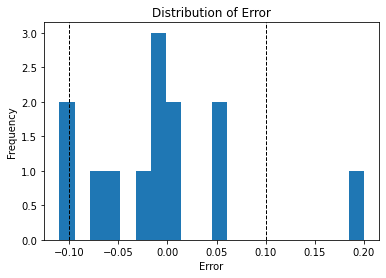

-0.0069230769230769285


In [44]:
filename = 'xxallxgbcpi.sav'
model_CPI = joblib.load(filename)
model=model_CPI

variable=df_test['CPI']

df_test_ref=XT_all
y_pred = model.predict(df_test_ref)
y_pred= pd.DataFrame(y_pred)
df_test['output']=y_pred
output=df_test['output']
mae_var = MAE(variable, output)
print('Result (Test)')
print("MAE : %.5f" %(mae_var))
result = pd.DataFrame()
result['Y_True'] = variable
result['Y_Pred'] = output
result['Error'] = (result['Y_True'] - result['Y_Pred']).round(2)
plt.hist(result['Error'], bins=20)
plt.axvline(0.1, color='k', linestyle='dashed', linewidth=1)
plt.axvline(-0.1, color='k', linestyle='dashed', linewidth=1)
plt.title('Distribution of Error')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()
print(mean(result['Error']))

Result (Test)
MAE : 0.05011


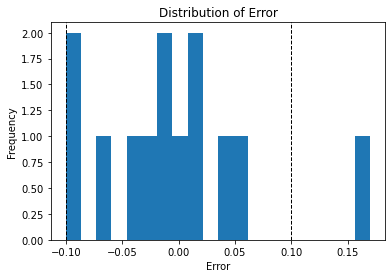

-0.003076923076923077


In [45]:
filename = 'xxdexgbcpi.sav'
model_CPI = joblib.load(filename)
model=model_CPI

variable=df_test['CPI']

df_test_ref=XT_de
y_pred = model.predict(df_test_ref)
y_pred= pd.DataFrame(y_pred)
df_test['output']=y_pred
output=df_test['output']
mae_var = MAE(variable, output)
print('Result (Test)')
print("MAE : %.5f" %(mae_var))
result = pd.DataFrame()
result['Y_True'] = variable
result['Y_Pred'] = output
result['Error'] = (result['Y_True'] - result['Y_Pred']).round(2)
plt.hist(result['Error'], bins=20)
plt.axvline(0.1, color='k', linestyle='dashed', linewidth=1)
plt.axvline(-0.1, color='k', linestyle='dashed', linewidth=1)
plt.title('Distribution of Error')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()
print(mean(result['Error']))

Result (Test)
MAE : 0.06146


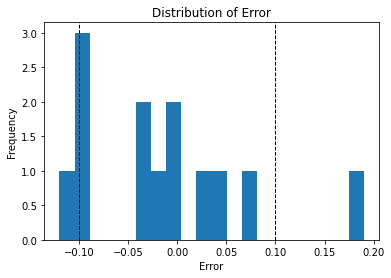

-0.01230769230769231


In [47]:
filename = 'xxcpixgbcpi.sav'
model_CPI = joblib.load(filename)
model=model_CPI

variable=df_test['CPI']

df_test_ref=XT_cpi
y_pred = model.predict(df_test_ref)
y_pred= pd.DataFrame(y_pred)
df_test['output']=y_pred
output=df_test['output']
mae_var = MAE(variable, output)
print('Result (Test)')
print("MAE : %.5f" %(mae_var))
result = pd.DataFrame()
result['Y_True'] = variable
result['Y_Pred'] = output
result['Error'] = (result['Y_True'] - result['Y_Pred']).round(2)
plt.hist(result['Error'], bins=20)
plt.axvline(0.1, color='k', linestyle='dashed', linewidth=1)
plt.axvline(-0.1, color='k', linestyle='dashed', linewidth=1)
plt.title('Distribution of Error')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()
print(mean(result['Error']))

Result (Test)
MAE : 1.99454


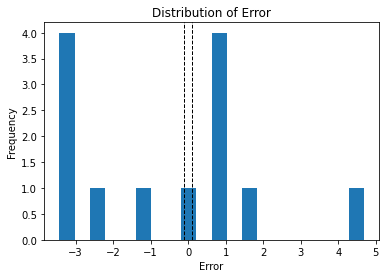

-0.5438461538461539


In [51]:
filename = 'xxallxgbdpi.sav'
model = joblib.load(filename)


variable=df_test['DPI']

df_test_ref=XT_all
y_pred = model.predict(df_test_ref)
y_pred= pd.DataFrame(y_pred)
df_test['output']=y_pred
output=df_test['output']
mae_var = MAE(variable, output)
print('Result (Test)')
print("MAE : %.5f" %(mae_var))
result = pd.DataFrame()
result['Y_True'] = variable
result['Y_Pred'] = output
result['Error'] = (result['Y_True'] - result['Y_Pred']).round(2)
plt.hist(result['Error'], bins=20)
plt.axvline(0.1, color='k', linestyle='dashed', linewidth=1)
plt.axvline(-0.1, color='k', linestyle='dashed', linewidth=1)
plt.title('Distribution of Error')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()
print(mean(result['Error']))

Result (Test)
MAE : 1.84826


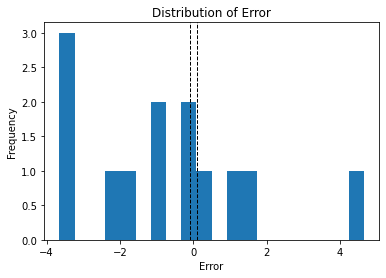

-0.6407692307692306


In [52]:
filename = 'xxdexgbdpi.sav'
model = joblib.load(filename)


variable=df_test['DPI']

df_test_ref=XT_de
y_pred = model.predict(df_test_ref)
y_pred= pd.DataFrame(y_pred)
df_test['output']=y_pred
output=df_test['output']
mae_var = MAE(variable, output)
print('Result (Test)')
print("MAE : %.5f" %(mae_var))
result = pd.DataFrame()
result['Y_True'] = variable
result['Y_Pred'] = output
result['Error'] = (result['Y_True'] - result['Y_Pred']).round(2)
plt.hist(result['Error'], bins=20)
plt.axvline(0.1, color='k', linestyle='dashed', linewidth=1)
plt.axvline(-0.1, color='k', linestyle='dashed', linewidth=1)
plt.title('Distribution of Error')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()
print(mean(result['Error']))

Result (Test)
MAE : 1.81316


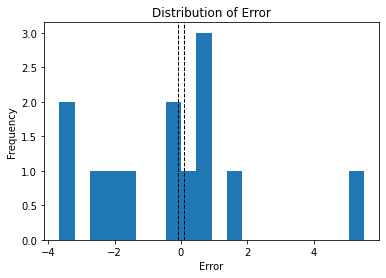

-0.3700000000000001


In [53]:
filename = 'xxdpixgbdpi.sav'
model = joblib.load(filename)


variable=df_test['DPI']

df_test_ref=XT_dpi
y_pred = model.predict(df_test_ref)
y_pred= pd.DataFrame(y_pred)
df_test['output']=y_pred
output=df_test['output']
mae_var = MAE(variable, output)
print('Result (Test)')
print("MAE : %.5f" %(mae_var))
result = pd.DataFrame()
result['Y_True'] = variable
result['Y_Pred'] = output
result['Error'] = (result['Y_True'] - result['Y_Pred']).round(2)
plt.hist(result['Error'], bins=20)
plt.axvline(0.1, color='k', linestyle='dashed', linewidth=1)
plt.axvline(-0.1, color='k', linestyle='dashed', linewidth=1)
plt.title('Distribution of Error')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()
print(mean(result['Error']))

Result (Test)
MAE : 0.04530


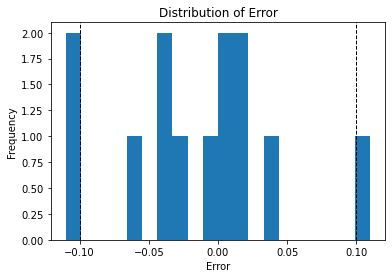

-0.014615384615384615


In [54]:
filename = 'xxallxgbec.sav'
model = joblib.load(filename)


variable=df_test['EC']

df_test_ref=XT_all
y_pred = model.predict(df_test_ref)
y_pred= pd.DataFrame(y_pred)
df_test['output']=y_pred
output=df_test['output']
mae_var = MAE(variable, output)
print('Result (Test)')
print("MAE : %.5f" %(mae_var))
result = pd.DataFrame()
result['Y_True'] = variable
result['Y_Pred'] = output
result['Error'] = (result['Y_True'] - result['Y_Pred']).round(2)
plt.hist(result['Error'], bins=20)
plt.axvline(0.1, color='k', linestyle='dashed', linewidth=1)
plt.axvline(-0.1, color='k', linestyle='dashed', linewidth=1)
plt.title('Distribution of Error')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()
print(mean(result['Error']))

Result (Test)
MAE : 0.04732


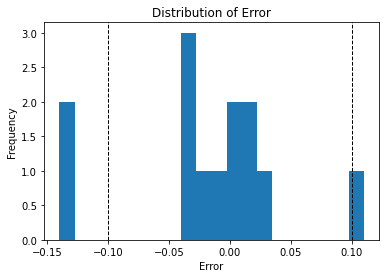

-0.016923076923076916


In [55]:
filename = 'xxdexgbec.sav'
model = joblib.load(filename)


variable=df_test['EC']

df_test_ref=XT_de
y_pred = model.predict(df_test_ref)
y_pred= pd.DataFrame(y_pred)
df_test['output']=y_pred
output=df_test['output']
mae_var = MAE(variable, output)
print('Result (Test)')
print("MAE : %.5f" %(mae_var))
result = pd.DataFrame()
result['Y_True'] = variable
result['Y_Pred'] = output
result['Error'] = (result['Y_True'] - result['Y_Pred']).round(2)
plt.hist(result['Error'], bins=20)
plt.axvline(0.1, color='k', linestyle='dashed', linewidth=1)
plt.axvline(-0.1, color='k', linestyle='dashed', linewidth=1)
plt.title('Distribution of Error')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()
print(mean(result['Error']))

Result (Test)
MAE : 0.04799


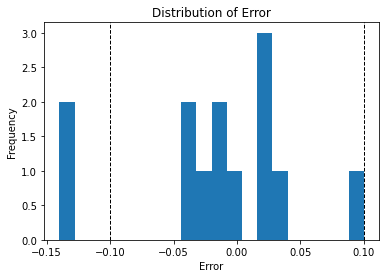

-0.017692307692307688


In [56]:
filename = 'xxecxgbec.sav'
model = joblib.load(filename)


variable=df_test['EC']

df_test_ref=XT_ec
y_pred = model.predict(df_test_ref)
y_pred= pd.DataFrame(y_pred)
df_test['output']=y_pred
output=df_test['output']
mae_var = MAE(variable, output)
print('Result (Test)')
print("MAE : %.5f" %(mae_var))
result = pd.DataFrame()
result['Y_True'] = variable
result['Y_Pred'] = output
result['Error'] = (result['Y_True'] - result['Y_Pred']).round(2)
plt.hist(result['Error'], bins=20)
plt.axvline(0.1, color='k', linestyle='dashed', linewidth=1)
plt.axvline(-0.1, color='k', linestyle='dashed', linewidth=1)
plt.title('Distribution of Error')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()
print(mean(result['Error']))

Result (Test)
MAE : 0.03276


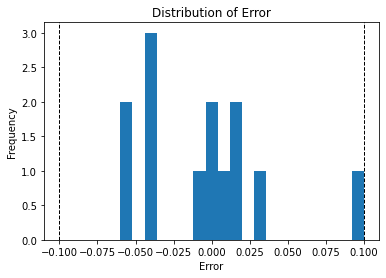

-0.005384615384615387


In [57]:
filename = 'xxeclrec.sav'
model = joblib.load(filename)


variable=df_test['EC']

df_test_ref=XT_ec
y_pred = model.predict(df_test_ref)
y_pred= pd.DataFrame(y_pred)
df_test['output']=y_pred
output=df_test['output']
mae_var = MAE(variable, output)
print('Result (Test)')
print("MAE : %.5f" %(mae_var))
result = pd.DataFrame()
result['Y_True'] = variable
result['Y_Pred'] = output
result['Error'] = (result['Y_True'] - result['Y_Pred']).round(2)
plt.hist(result['Error'], bins=20)
plt.axvline(0.1, color='k', linestyle='dashed', linewidth=1)
plt.axvline(-0.1, color='k', linestyle='dashed', linewidth=1)
plt.title('Distribution of Error')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()
print(mean(result['Error']))